### Importing the Data and Associated Preliminary Analysis

For my project, I wanted to take a look at college basketball statistics from the 2020-2021 season. I used a dataset from kaggle.com, which is listed below in the code segment. The columns of the data set with associated descriptions are as follows:
- TEAM: name of team being analyzed
- CONF: name of conference the team plays for
- G: Games played
- W: Games won
- ADJOE: Adjusted Offensive Efficiency (Estimate of Average Points Scored per 100 Posessions)
- ADJDE: Adjusted Defensive Efficiency (Estimate of Average Points Allowed per 100 Posessions)
- BARTHAG: Power Rating (Chance of Beating an average D1 team)
- EFG_O: Field Goal Percentage
- EFG_D: Field Goal Percentage Allowed
- TOR: Turnover Percentage
- TORD: Steal Rate
- ORB: Offensive Rebound Rate
- DRB: Defensive Rebound Rate
- FTR: Free Throw Rate
- FTRD: Free Throw Rate Allowed
- 2P_O: Two-Point Shooting Percentage
- 2P_D: Two-Point Shooting Percentage Allowed
- 3P_O: Three-Point Shooting Percentage
- 3P_D: Three-Point Shooting Percentage Allowed
- ADJ_T: Adjusted Tempo (Posessions per 40 minutes)
- WAB: Wins Above Bubble (Wins against top teams)
- SEED: Seed in the NCAA March Madness Tournament

Using these entities, I have decided to ask the following questions:
1. Which stats are best predictors of tournament seeding? Answer this question in terms of macrostats (wins, power rating, etc.) and microstats (field goal percentage, field goal percentage allowed, etc.).

and

2. What was the best division in college basketball entering the 2021 Men's NCAA Tournament?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data set from https://www.kaggle.com/andrewsundberg/college-basketball-dataset?select=cbb21.csv
rawdata = pd.read_csv("C:/Users/kharm/OneDrive/Documents/Syracuse/Spring 2022/IST 652/Mini-Project1/cbbdata.csv")
rawdata.head()
rawdata.shape

(347, 22)

In [3]:
for col in rawdata.columns: #cycles through columns
    if sum(rawdata[col].isna()) != 0: #detecting any NAs
        print(col) #printing any column with an NA
    elif sum(rawdata[col].isnull()) != 0: #detecting and NULL
        print(col) #printing any column with a NULL (that did not already register with NA)
        
if len(set(rawdata["TEAM"])) == len(rawdata["TEAM"]):
    print("No Duplicates")

SEED
No Duplicates


It is okay that SEED has some empty columns; not all teams can make the tournament. Now, let's break up the raw dataset into smaller data sets that are better equipped to handle our questions.

In [4]:
macro = ['G','W','ADJOE','ADJDE','BARTHAG','ADJ_T','WAB'] #macro categories
micro = ['EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D'] #micro categories

macrodata = rawdata[['TEAM','CONF','SEED']] #base data set with team, conference, and seed
microdata = rawdata[['TEAM','CONF','SEED']]

for col in macro: #for each macro category
    macrodata[col] = rawdata[col] #append the data into macro data set
for col in micro: #for each micro category
    microdata[col] = rawdata[col] #append the data into micro data set

C:\Users\kharm\AppData\Local\Temp/ipykernel_13660/3586182047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macrodata[col] = rawdata[col] #append the data into macro data set
C:\Users\kharm\AppData\Local\Temp/ipykernel_13660/3586182047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macrodata[col] = rawdata[col] #append the data into macro data set
C:\Users\kharm\AppData\Local\Temp/ipykernel_13660/3586182047.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [5]:
confdata = rawdata.groupby("CONF").agg("mean")
#confdata = rawdata grouped by Conference with average data over each team in conference

In [6]:
macrodata.head()

,TEAM,CONF,SEED,G,W,ADJOE,ADJDE,BARTHAG,ADJ_T,WAB
0,Michigan,B10,1.0,24,20,118.1,91.1,0.9521,66.9,7.2
1,Baylor,B12,1.0,24,22,123.2,94.5,0.9548,68.8,6.6
2,Illinois,B10,1.0,29,23,117.7,90.4,0.9539,70.7,8.9
3,Gonzaga,WCC,1.0,26,26,125.4,89.8,0.9791,74.6,8.5
4,Iowa,B10,2.0,29,21,123.5,95.7,0.9491,70.0,5.6


In [7]:
microdata.head()

,TEAM,CONF,SEED,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D
0,Michigan,B10,1.0,54.9,44.9,16.3,15.1,29.4,24.8,28.9,24.5,53.3,42.3,38.7,33.5
1,Baylor,B12,1.0,57.5,49.1,17.6,24.6,37.5,30.9,27.0,31.7,54.1,48.1,41.8,34.0
2,Illinois,B10,1.0,55.6,46.6,18.2,16.1,33.0,22.2,39.2,30.5,55.3,45.4,37.6,32.7
3,Gonzaga,WCC,1.0,61.0,47.5,16.1,20.3,30.4,23.4,36.7,25.9,64.0,46.8,36.5,32.5
4,Iowa,B10,2.0,54.6,48.3,13.3,16.3,30.7,28.6,32.0,22.6,52.4,45.8,38.6,34.8


In [8]:
confdata.iloc[:5,:10] #head of first 10 columns

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB
CONF,,,,,,,,,,
A10,20.214286,10.714286,104.257143,98.485714,0.635600,50.178571,49.578571,18.692857,19.028571,26.957143
ACC,23.400000,13.066667,109.540000,96.793333,0.781467,51.306667,50.373333,18.026667,18.666667,29.260000
AE,18.300000,8.900000,96.640000,103.850000,0.320220,48.690000,49.110000,19.310000,18.920000,26.070000
ASun,20.777778,12.111111,98.644444,106.300000,0.311000,50.988889,51.422222,19.222222,18.700000,25.555556
Amer,20.909091,12.090909,104.572727,96.500000,0.675891,48.127273,47.745455,19.290909,19.872727,29.700000


### Question 1a: Best Macrodata

In [9]:
macrodata["WP"] = macrodata["W"]/macrodata["G"] #win percentage

macrodata["SEED"] = macrodata["SEED"].fillna(17) #providing artifical 17 seed for teams that did not make it

C:\Users\kharm\AppData\Local\Temp/ipykernel_13660/2891211897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macrodata["WP"] = macrodata["W"]/macrodata["G"] #win percentage
C:\Users\kharm\AppData\Local\Temp/ipykernel_13660/2891211897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macrodata["SEED"] = macrodata["SEED"].fillna(17) #providing artifical 17 seed for teams that did not make it


In [10]:
macrodata.groupby("SEED").agg("mean")

,G,W,ADJOE,ADJDE,BARTHAG,ADJ_T,WAB,WP
SEED,,,,,,,,
1.0,25.750000,22.750000,121.100000,91.450000,0.959975,70.250000,7.800000,0.885776
2.0,28.750000,22.500000,119.300000,92.925000,0.945000,68.950000,5.600000,0.786804
3.0,27.000000,19.750000,112.150000,92.500000,0.901625,70.000000,4.000000,0.730973
4.0,25.250000,18.000000,113.525000,93.275000,0.903200,67.125000,3.575000,0.714556
5.0,26.500000,19.000000,113.700000,93.425000,0.905450,66.850000,2.925000,0.716800
6.0,26.750000,20.500000,112.050000,91.875000,0.907275,66.775000,2.650000,0.768216
7.0,23.500000,16.250000,111.050000,94.075000,0.866500,66.475000,2.350000,0.688849
8.0,26.500000,18.750000,111.900000,93.550000,0.885575,68.425000,1.675000,0.708150
9.0,24.750000,16.500000,111.675000,93.275000,0.886150,66.500000,2.075000,0.676552


In [11]:
macrodata.corrwith(macrodata["SEED"]) #finding the correlation coefficients of each column with "SEED"

SEED       1.000000
G         -0.373938
W         -0.570661
ADJOE     -0.632917
ADJDE      0.561508
BARTHAG   -0.616880
ADJ_T      0.058320
WAB       -0.694248
WP        -0.447504
dtype: float64

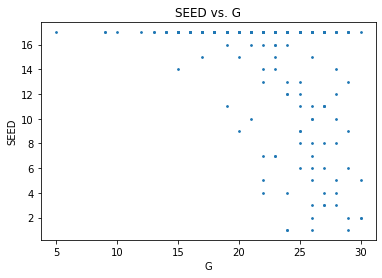

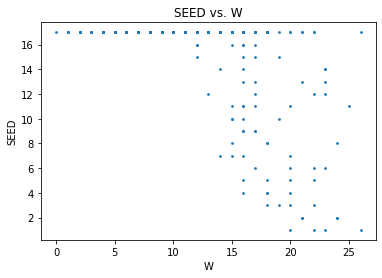

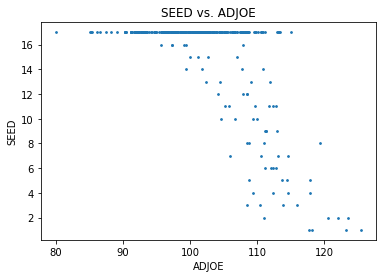

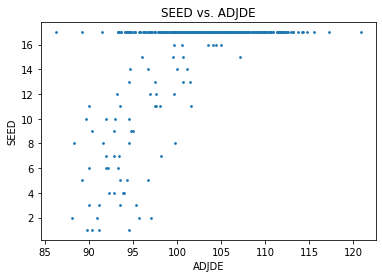

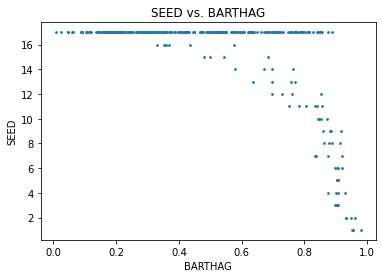

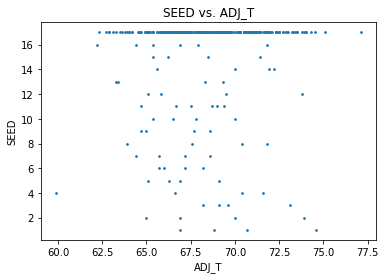

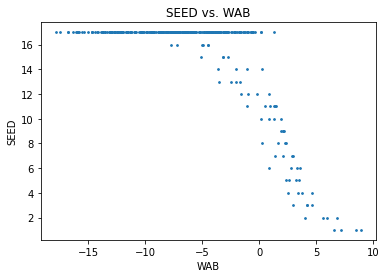

In [24]:
for col in macro:
    plt.figure()
    plt.title("SEED vs. " + col)
    plt.xlabel(col)
    plt.ylabel("SEED")
    plt.scatter(macrodata[col],macrodata["SEED"], s = 3)

Although each factor other than estimated tempo show some association (from correlation coefficient and plots), wins above bubble (WAB), Power Rating and Offensive Efficiency appeared to be the strongest indicators of high seeding in the 2021 tournament. It noteworthy that wins and win percentage were not one of the top three documented macrostats which influenced team seeding.

### Question 1b: Best Microdata

In [13]:
microdata["SEED"] = microdata["SEED"].fillna(17) #providing artifical 17 seed for teams that did not make it

C:\Users\kharm\AppData\Local\Temp/ipykernel_13660/2463604018.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  microdata["SEED"] = microdata["SEED"].fillna(17) #providing artifical 17 seed for teams that did not make it


In [14]:
microdata.groupby("SEED").agg("mean")

,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D
SEED,,,,,,,,,,,,
1.0,57.250000,47.025000,17.050000,19.025000,32.575000,25.325000,32.950000,28.150000,56.675000,45.650000,38.650000,33.175000
2.0,52.575000,46.350000,15.875000,18.500000,32.675000,28.450000,32.225000,32.675000,51.125000,45.650000,36.425000,31.550000
3.0,50.725000,47.875000,18.075000,19.700000,32.375000,27.825000,34.150000,30.250000,50.000000,47.475000,34.775000,32.450000
4.0,53.500000,47.550000,18.900000,17.750000,30.650000,27.075000,30.825000,30.425000,53.075000,46.725000,36.100000,32.625000
5.0,52.650000,48.075000,16.075000,19.875000,28.750000,26.800000,30.475000,27.650000,52.300000,47.100000,35.600000,33.150000
6.0,52.375000,46.650000,17.550000,19.925000,32.000000,26.175000,34.725000,30.825000,51.450000,44.275000,36.075000,33.625000
7.0,51.700000,48.125000,18.650000,20.500000,30.625000,28.775000,28.450000,32.100000,50.750000,47.850000,35.450000,32.375000
8.0,52.100000,48.200000,17.725000,19.500000,31.500000,26.900000,32.150000,25.350000,52.675000,47.475000,34.050000,33.075000
9.0,51.175000,48.525000,16.300000,19.600000,27.675000,28.100000,30.300000,30.525000,50.750000,47.800000,34.575000,33.250000


In [15]:
microdata.corrwith(microdata["SEED"]) #finding the correlation coefficients of each column with "SEED"

SEED     1.000000
EFG_O   -0.351821
EFG_D    0.383498
TOR      0.281932
TORD    -0.063642
ORB     -0.301150
DRB      0.113471
FTR     -0.021745
FTRD     0.136430
2P_O    -0.279177
2P_D     0.375528
3P_O    -0.309955
3P_D     0.211612
dtype: float64

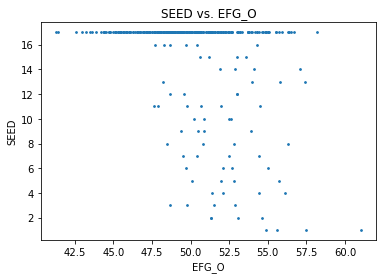

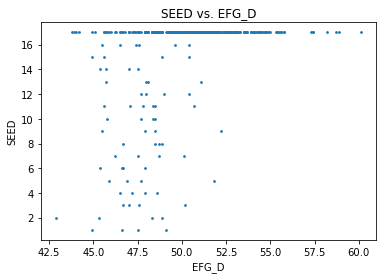

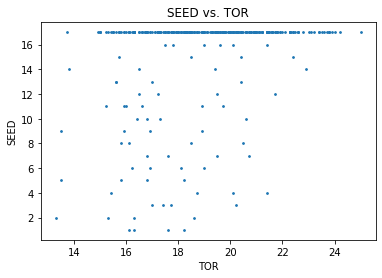

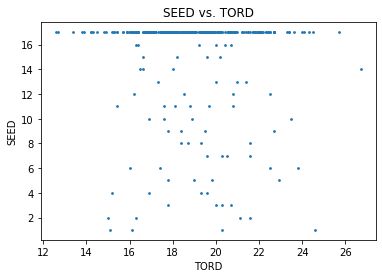

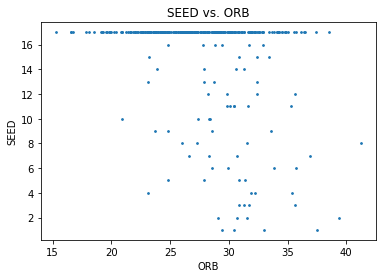

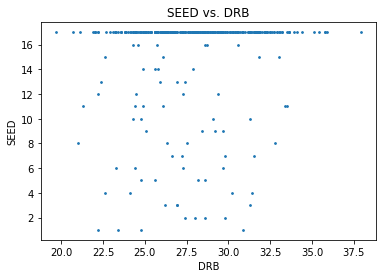

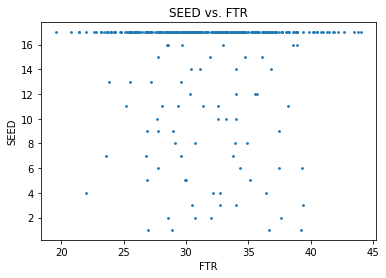

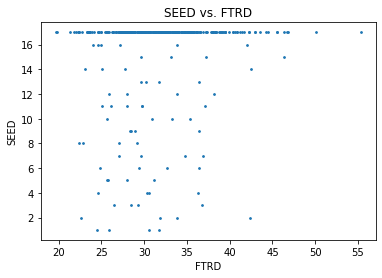

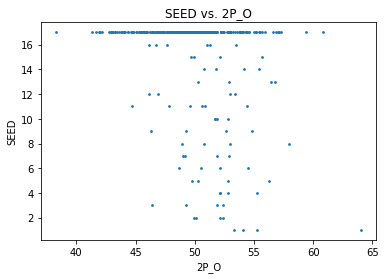

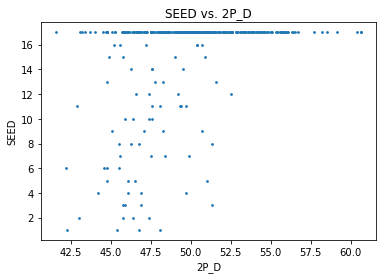

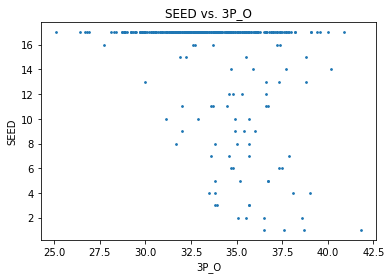

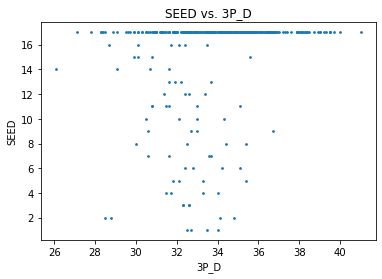

In [25]:
for col in micro:
    plt.figure()
    plt.title("SEED vs. " + col)
    plt.xlabel(col)
    plt.ylabel("SEED")
    plt.scatter(microdata[col],microdata["SEED"], s = 3)

Based on the averages, plots, and correlations, the results had some surprising factors outside the expected impact of effective offensive and defensive efficiency. In this data set, free throw rate had little effect on the seeding of a team. 2 point field goal defense came in as the most important stat for seeding purposes (outside the overall officiencies), with three point field goal percentage and offensive rebounds coming in close behind.

### Question 2: What was the best Conference?

We will try to answer this question in two ways. First, we will look at the general statistics of teams who made the tournament to see which conference had the most contribution. Second, we will take a look at the notable stats from our first question and see which conferences showed similar statistics, then compare the outcome to the first result.

In [17]:
finaldata = rawdata.dropna() #looking at only teams that made the tounament

In [37]:
count = finaldata[["TEAM","CONF"]].groupby("CONF").agg("count") #amount of teams from each conference
count.sort_values("TEAM", ascending = False).head(6)

,TEAM
CONF,
B10,9
ACC,7
B12,7
SEC,6
P12,5
BE,4


In [19]:
finaldata["Score"] = abs(finaldata["SEED"]-17) #by subtracting 17 and taking the absolute value,
#we are finding a rough score of each seeded team, with one seeds being the highest at 16.

C:\Users\kharm\AppData\Local\Temp/ipykernel_13660/3344442783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finaldata["Score"] = abs(finaldata["SEED"]-17) #by subtracting 17 and taking the absolute value,


In [20]:
avgscore = finaldata[["CONF","Score"]].groupby("CONF").agg("mean") #finding the average score of each conference
confscore = count.to_numpy()*avgscore.to_numpy() #multiplying average score by seed count to get score of whole conference

In [39]:
rawresult = {"CONF": list(sorted(set(rawdata["CONF"]))), "COUNT": list(count.to_numpy()), "SCORE": list(confscore)} #organizing scores with conference
result = pd.DataFrame(data = rawresult) #putting into a data frame
result["SCORE"] = result["SCORE"].astype(float) #converting to float
result["COUNT"] = result["COUNT"].astype(float) #converting to float
result

,CONF,COUNT,SCORE
0,A10,2.0,15.0
1,ACC,7.0,66.0
2,AE,1.0,1.0
3,ASun,1.0,4.0
4,Amer,2.0,21.0
5,B10,9.0,103.0
6,B12,7.0,91.0
7,BE,4.0,39.0
8,BSky,1.0,3.0
9,BSth,1.0,5.0


In [40]:
result.sort_values("SCORE", ascending=False).head(6)

,CONF,COUNT,SCORE
5,B10,9.0,103.0
6,B12,7.0,91.0
25,SEC,6.0,68.0
1,ACC,7.0,66.0
21,P12,5.0,44.0
7,BE,4.0,39.0


The top producing conference for the 2021 season was the Big 10, followed by the Big 12. The next grouping (ACC and SEC) was significantly lower. Moving on to part 2:

In [23]:
importantstats = ['WAB','BARTHAG','ADJOE','EFG_O', 'EFG_D', 'ORB','2P_D', '3P_O']

for stat in importantstats:
    for conf in sorted(set(rawdata["CONF"])):
        if stat == "EFG_D" or stat == "2P_D":
            if confdata[stat][conf] == min(confdata[stat]):
                print("Minimum contributor in " + str(stat) + " was the " + str(conf) + " conference.")
        else:
            if confdata[stat][conf] == max(confdata[stat]):
                print("Max contributor in " + str(stat) + " was the " + str(conf) + " conference.")

Max contributor in WAB was the B10 conference.
Max contributor in BARTHAG was the B10 conference.
Max contributor in ADJOE was the B10 conference.
Max contributor in EFG_O was the SC conference.
Minimum contributor in EFG_D was the Amer conference.
Max contributor in ORB was the SEC conference.
Minimum contributor in 2P_D was the Amer conference.
Max contributor in 3P_O was the Sum conference.


The results of this analysis show that the macrostats did a great job predicting the max contributor, which was the Big 10 in each category. The microstats, however, did not do great predicting the best conferences, having only one top seven conference showing the best stat.